# California house price prediction

## 1. Contexto
Este es el conjunto de datos utilizado en el segundo capítulo del libro de Aurélien Géron, Hands-On Machine Learning with Scikit-Learn and TensorFlow. Es una excelente introducción a la implementación de algoritmos de aprendizaje automático porque requiere una limpieza de datos básica, tiene una lista de variables fácilmente comprensible y se encuentra en un tamaño óptimo: ni demasiado pequeño ni excesivamente complicado.
Se trata de un conjunto de datos que contiene información del censo de California de 1990. 

## 2. Datos
Los datos se refieren a las viviendas de un distrito específico de California y algunas estadísticas resumidas sobre ellas basadas en el censo de 1990. ¡Advertencia! Los datos no están limpios, por lo que se requieren algunos pasos de preprocesamiento.

### 2.1 Carga de datos

In [301]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing()
# housing

In [302]:
# Load Data
# df = pd.DataFrame(housing['data'])
# df.columns = housing['feature_names']
# df[housing['target_names'][0]] = housing['target']
X_train= pd.read_csv('./data/X_train_scaledVC.csv',sep=";",index_col=False)
X_test= pd.read_csv('./data/X_test_scaledVC.csv',sep=";",index_col=False)

df= pd.concat([X_train, X_test], axis=0)
# print()
df.head()

,serv_barrio,tam_hogar,planta,viv_nuevas_transacciones,energia,total_estaciones,habitantes,total_transacciones,hog_con_10,tamano_medio_del_hogar,...,grupo_cocina_Abierta,grupo_cocina_Amueblada,grupo_cocina_Desconocido,grupo_cocina_Equipada,grupo_cocina_Independiente,grupo_cocina_Isla,grupo_cocina_No_amueblada,grupo_cocina_Reformada,grupo_cocina_Sin_reforma,target
0,-1.308034,-1.469589,0.666667,-0.287879,0.0,-0.433962,-0.480393,-0.709544,-0.390244,0.457143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.173817
1,-0.532903,-0.511523,-1.333333,0.015152,0.0,0.811321,-0.015433,0.004149,-0.268293,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.940885
2,-0.532903,-0.511523,0.666667,-0.166667,0.0,0.811321,-0.015433,-0.522822,-0.268293,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.611012
3,1.792895,0.000000,1.333333,-0.227273,0.0,-0.047170,0.000000,0.697095,-0.780488,-0.485714,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.191053
4,0.186112,-0.198384,0.666667,0.196970,0.0,-0.103774,0.129497,-0.651452,-0.634146,-0.400000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.151652


In [303]:
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 1973
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   serv_barrio                    9868 non-null   float64
 1   tam_hogar                      9868 non-null   float64
 2   planta                         9868 non-null   float64
 3   viv_nuevas_transacciones       9868 non-null   float64
 4   energia                        9868 non-null   float64
 5   total_estaciones               9868 non-null   float64
 6   habitantes                     9868 non-null   float64
 7   total_transacciones            9868 non-null   float64
 8   hog_con_10                     9868 non-null   float64
 9   tamano_medio_del_hogar         9868 non-null   float64
 10  m2_constr                      9868 non-null   float64
 11  amueblado                      9868 non-null   float64
 12  lineas_metro                   9868 non-null   float6

In [304]:
# Identifying the unique number of values in the dfset
df.nunique()

serv_barrio                    21
tam_hogar                      21
planta                         29
viv_nuevas_transacciones       58
energia                         5
                             ... 
grupo_cocina_Isla               2
grupo_cocina_No_amueblada       2
grupo_cocina_Reformada          2
grupo_cocina_Sin_reforma        2
target                       1591
Length: 75, dtype: int64

### 2.2 Análisis de datos

In [305]:
# Check for missing values
df.isnull().sum()

serv_barrio                  0
tam_hogar                    0
planta                       0
viv_nuevas_transacciones     0
energia                      0
                            ..
grupo_cocina_Isla            0
grupo_cocina_No_amueblada    0
grupo_cocina_Reformada       0
grupo_cocina_Sin_reforma     0
target                       0
Length: 75, dtype: int64

In [306]:
# Viewing the df statistics
df.describe()

,serv_barrio,tam_hogar,planta,viv_nuevas_transacciones,energia,total_estaciones,habitantes,total_transacciones,hog_con_10,tamano_medio_del_hogar,...,grupo_cocina_Abierta,grupo_cocina_Amueblada,grupo_cocina_Desconocido,grupo_cocina_Equipada,grupo_cocina_Independiente,grupo_cocina_Isla,grupo_cocina_No_amueblada,grupo_cocina_Reformada,grupo_cocina_Sin_reforma,target
count,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000,...,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000
mean,0.145110,-0.052530,0.398595,0.920579,0.266113,0.346973,0.330679,0.078374,0.101249,-0.157985,...,0.020268,0.024524,0.899980,0.008208,0.046311,0.000203,0.000101,0.000203,0.000203,0.476612
std,0.930133,0.823549,1.467375,3.037662,0.746546,0.731071,0.806397,0.813552,0.874747,0.704413,...,0.140921,0.154676,0.300042,0.090232,0.210169,0.014236,0.010067,0.014236,0.014236,1.341270
min,-1.308034,-2.381445,-2.000000,-0.348485,0.000000,-0.632075,-1.653312,-1.265560,-0.975610,-1.314286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.495786
25%,-0.555511,-0.511523,-0.333333,-0.257576,0.000000,-0.103774,-0.102463,-0.514523,-0.536585,-0.485714,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.279973
50%,0.000000,0.000000,0.000000,-0.015152,0.000000,0.000000,0.000000,0.000000,0.000000,-0.171429,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004666
75%,0.444489,0.488477,0.666667,0.742424,0.000000,0.896226,0.897537,0.485477,0.463415,0.514286,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.712765
max,1.792895,1.118318,16.666667,32.015152,4.000000,2.443396,1.986866,3.215768,2.341463,1.057143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.713990


In [309]:
df.query("m2_constr<26")

,serv_barrio,tam_hogar,planta,viv_nuevas_transacciones,energia,total_estaciones,habitantes,total_transacciones,hog_con_10,tamano_medio_del_hogar,...,grupo_cocina_Abierta,grupo_cocina_Amueblada,grupo_cocina_Desconocido,grupo_cocina_Equipada,grupo_cocina_Independiente,grupo_cocina_Isla,grupo_cocina_No_amueblada,grupo_cocina_Reformada,grupo_cocina_Sin_reforma,target
0,-1.308034,-1.469589,0.666667,-0.287879,0.0,-0.433962,-0.480393,-0.709544,-0.390244,0.457143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.173817
1,-0.532903,-0.511523,-1.333333,0.015152,0.0,0.811321,-0.015433,0.004149,-0.268293,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.940885
2,-0.532903,-0.511523,0.666667,-0.166667,0.0,0.811321,-0.015433,-0.522822,-0.268293,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.611012
3,1.792895,0.000000,1.333333,-0.227273,0.0,-0.047170,0.000000,0.697095,-0.780488,-0.485714,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.191053
4,0.186112,-0.198384,0.666667,0.196970,0.0,-0.103774,0.129497,-0.651452,-0.634146,-0.400000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.151652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1.792895,0.000000,2.000000,-0.287879,0.0,-0.047170,0.000000,-0.261411,-0.780488,-0.485714,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.432792
1970,-1.154219,-1.274887,0.666667,-0.348485,0.0,-0.075472,0.227174,-1.240664,0.853659,1.057143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.432909
1971,0.000000,1.118318,0.666667,0.560606,0.0,0.000000,-0.102463,1.257261,0.000000,-1.314286,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.386130
1972,0.000000,1.118318,1.333333,0.651515,0.0,0.000000,-0.102463,-0.215768,0.000000,-1.314286,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.255592


In [307]:
# Finding out the correlation between the features
#corr = df.corr()
corr =  df.drop(columns=['url']).corr()
corr

,serv_barrio,tam_hogar,planta,viv_nuevas_transacciones,energia,total_estaciones,habitantes,total_transacciones,hog_con_10,tamano_medio_del_hogar,...,grupo_cocina_Abierta,grupo_cocina_Amueblada,grupo_cocina_Desconocido,grupo_cocina_Equipada,grupo_cocina_Independiente,grupo_cocina_Isla,grupo_cocina_No_amueblada,grupo_cocina_Reformada,grupo_cocina_Sin_reforma,target
serv_barrio,1.000000,0.293382,0.060790,-0.220279,-0.053141,-0.366776,-0.154983,0.045977,-0.377187,-0.436536,...,0.031670,0.019780,0.006382,0.027627,-0.056582,0.011502,-0.000775,-0.017205,0.003542,0.282458
tam_hogar,0.293382,1.000000,-0.031007,-0.200604,-0.004877,0.033294,0.337117,0.263433,0.258721,-0.681596,...,0.013410,-0.009084,0.014307,0.010677,-0.026656,0.010576,0.006573,-0.018905,-0.006054,0.007600
planta,0.060790,-0.031007,1.000000,0.004786,-0.035993,-0.087829,-0.076973,-0.010227,-0.107662,-0.047324,...,-0.027635,-0.004522,0.031018,0.001312,-0.026013,0.009070,-0.002735,0.005836,0.031712,0.010159
viv_nuevas_transacciones,-0.220279,-0.200604,0.004786,1.000000,-0.004305,0.038912,0.052758,0.530624,0.135884,0.248244,...,-0.014857,-0.018934,0.029945,-0.016563,-0.010794,-0.004741,0.000213,-0.005593,-0.003818,-0.126635
energia,-0.053141,-0.004877,-0.035993,-0.004305,1.000000,0.028320,0.050805,0.001342,0.069198,0.049653,...,0.103827,0.136567,-0.195618,0.095454,0.065489,0.033070,-0.003589,0.013997,-0.005075,-0.050134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grupo_cocina_Isla,0.011502,0.010576,0.009070,-0.004741,0.033070,-0.007217,-0.006743,-0.010595,-0.008000,-0.014999,...,-0.002048,-0.002258,-0.042709,-0.001295,-0.003138,1.000000,-0.000143,-0.000203,-0.000203,0.020699
grupo_cocina_No_amueblada,-0.000775,0.006573,-0.002735,0.000213,-0.003589,0.007564,0.020677,0.003651,0.025783,0.010833,...,-0.001448,-0.001596,-0.030198,-0.000916,-0.002218,-0.000143,1.000000,-0.000143,-0.000143,-0.006283
grupo_cocina_Reformada,-0.017205,-0.018905,0.005836,-0.005593,0.013997,-0.013372,-0.008012,-0.011539,-0.001251,0.012145,...,-0.002048,-0.002258,-0.042709,-0.001295,-0.003138,-0.000203,-0.000143,1.000000,-0.000203,-0.006707
grupo_cocina_Sin_reforma,0.003542,-0.006054,0.031712,-0.003818,-0.005075,-0.002807,-0.001355,-0.004277,0.003910,0.005215,...,-0.002048,-0.002258,-0.042709,-0.001295,-0.003138,-0.000203,-0.000143,-0.000203,1.000000,-0.002217


<Axes: >

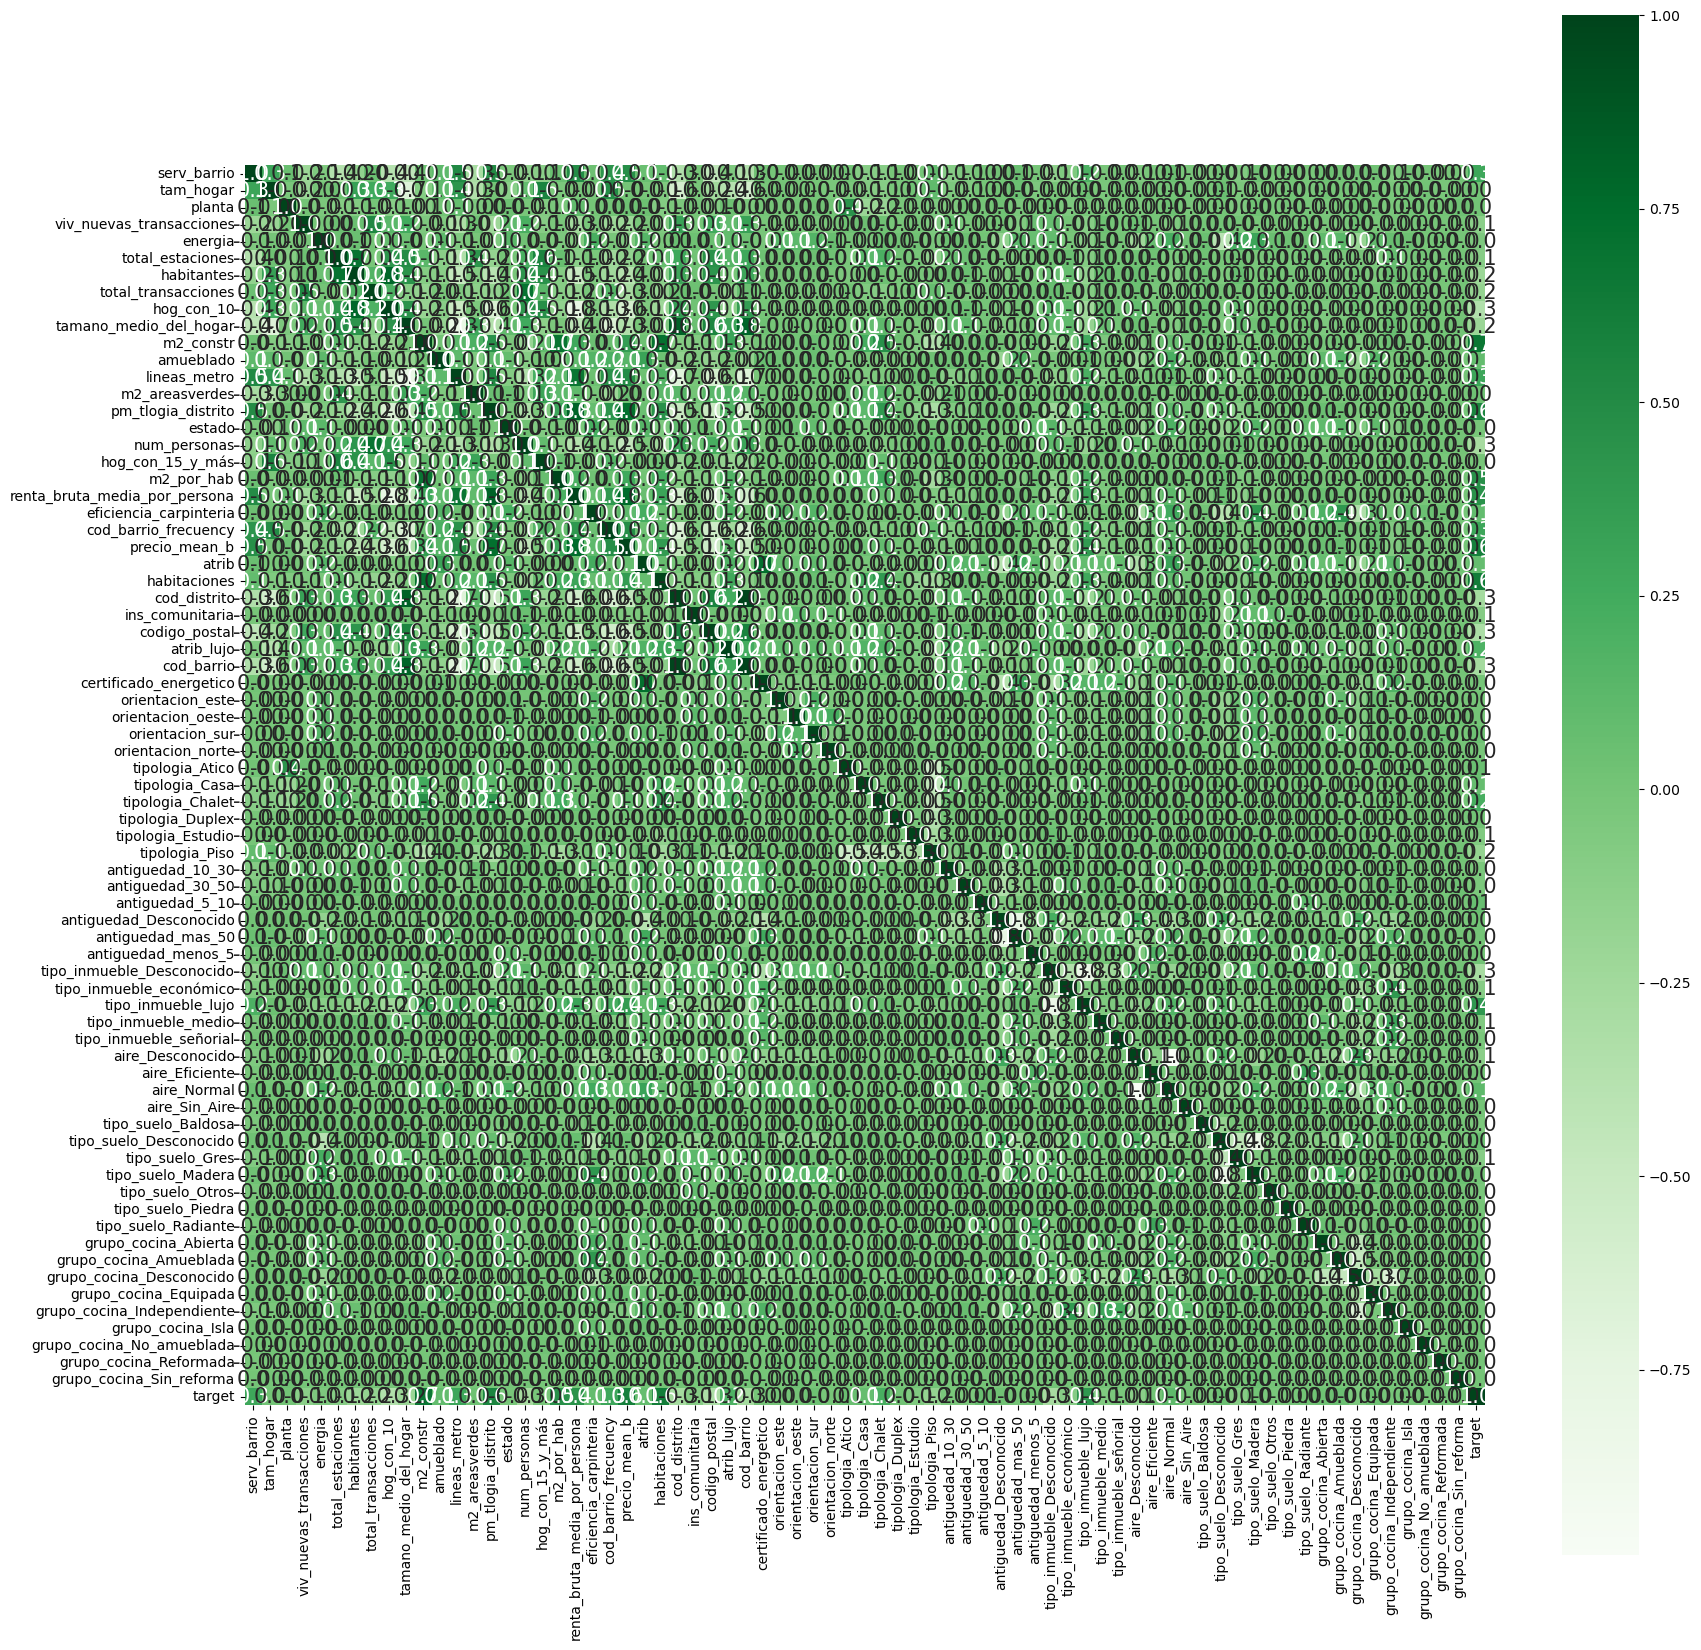

In [242]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [243]:
# Scatter plots between all features
import warnings
warnings.filterwarnings("ignore")  

#sns.pairplot(data=df)

### 2.3 Partición en train / test

In [244]:
# Spliting target variable and independent variables
#X = df.drop([housing['target_names'][0]], axis = 1)
#y = df[housing['target_names'][0]]
df_ids = X_train[['url']]
y_train=X_train['target']
y_test=X_test['target']
X_train = X_train.drop(columns=["url","target"])
X_test = X_test.drop(columns=["url","target"])
# Splitting to training and testing df
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [245]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#sc = StandardScaler().set_output(transform="pandas")  # Configuramos salida como Pandas
sc = RobustScaler().set_output(transform="pandas")  # Configuramos salida como Pandas

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [246]:
X_train.columns


Index(['serv_barrio', 'tam_hogar', 'planta', 'viv_nuevas_transacciones',
       'energia', 'total_estaciones', 'habitantes', 'total_transacciones',
       'hog_con_10', 'tamano_medio_del_hogar', 'm2_constr', 'amueblado',
       'lineas_metro', 'm2_areasverdes', 'pm_tlogia_distrito', 'estado',
       'num_personas', 'hog_con_15_y_más', 'm2_por_hab',
       'renta_bruta_media_por_persona', 'eficiencia_carpinteria',
       'cod_barrio_frecuency', 'precio_mean_b', 'atrib', 'habitaciones',
       'cod_distrito', 'ins_comunitaria', 'codigo_postal', 'atrib_lujo',
       'cod_barrio', 'certificado_energetico', 'orientacion_este',
       'orientacion_oeste', 'orientacion_sur', 'orientacion_norte',
       'tipologia_Atico', 'tipologia_Casa', 'tipologia_Chalet',
       'tipologia_Duplex', 'tipologia_Estudio', 'tipologia_Piso',
       'antiguedad_10_30', 'antiguedad_30_50', 'antiguedad_5_10',
       'antiguedad_Desconocido', 'antiguedad_mas_50', 'antiguedad_menos_5',
       'tipo_inmueble_Desconoc

In [247]:
# eliminamos la variable 'cod_barrio_group' por que tiene datos del precio en  test 
cols_eliminar=["cod_distrito","aire_Desconocido","cod_barrio","codigo_postal"]
	

# Aplicar la función a cada conjunto de datos con 5 columnas
X_train =X_train.drop(columns=cols_eliminar)
X_test = X_test.drop(columns=cols_eliminar)

In [248]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Modelo base para selección
#estimator = RandomForestRegressor()

estimator = XGBRegressor()
selector = RFE(estimator, n_features_to_select=30, step=1)
selector = selector.fit(X_train, y_train)

# Ver las variables seleccionadas
selected_features = X_train.columns[selector.support_]
print("Mejores variables:", list(selected_features))

Mejores variables: ['serv_barrio', 'planta', 'energia', 'total_estaciones', 'total_transacciones', 'hog_con_10', 'tamano_medio_del_hogar', 'm2_constr', 'm2_areasverdes', 'pm_tlogia_distrito', 'estado', 'num_personas', 'hog_con_15_y_más', 'm2_por_hab', 'renta_bruta_media_por_persona', 'cod_barrio_frecuency', 'precio_mean_b', 'atrib', 'habitaciones', 'atrib_lujo', 'orientacion_este', 'orientacion_oeste', 'orientacion_sur', 'tipologia_Atico', 'tipologia_Piso', 'antiguedad_10_30', 'antiguedad_Desconocido', 'antiguedad_mas_50', 'tipo_inmueble_Desconocido', 'tipo_inmueble_lujo']


In [249]:
# Crear un DataFrame solo con las mejores variables seleccionadas
X_train = X_train[selected_features]
X_test= X_test[selected_features]

# Verifica las dimensiones del nuevo DataFrame
print("Dimensiones del conjunto de entrenamiento reducido:", X_train.shape)
print("Dimensiones del conjunto de prueba reducido:", X_test.shape)

Dimensiones del conjunto de entrenamiento reducido: (7896, 30)
Dimensiones del conjunto de prueba reducido: (1974, 30)


## 3. Regresión Lineal

### 3.1 Entrenamiento del modelo

In [250]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [251]:
# Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns, lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,serv_barrio,0.025903
1,planta,0.019401
2,energia,0.014685
3,total_estaciones,-0.105674
4,total_transacciones,0.009319
5,hog_con_10,0.18284
6,tamano_medio_del_hogar,-0.051826
7,m2_constr,0.33952
8,m2_areasverdes,-0.009633
9,pm_tlogia_distrito,-0.004096


### 3.2 Evaluación sobre train

In [252]:
# Model prediction on train df
y_pred = lm.predict(X_train)

In [253]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6701451345105851
MAE: 0.3809067831486955
MSE: 0.5951372243812403
RMSE: 0.7714513752539691


- **𝑅^2**: Es una medida de la relación lineal entre X e Y. Se interpreta como la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente.

- **MAE**: Es la media del valor absoluto de los errores. Mide la diferencia entre dos variables continuas, en este caso, los valores reales y los valores predichos de y.

- **MSE**: El error cuadrático medio (MSE, por sus siglas en inglés) es similar al MAE, pero eleva al cuadrado la diferencia antes de sumarlas todas, en lugar de usar el valor absoluto.

- **RMSE**: La raíz cuadrada del error cuadrático medio (RMSE, por sus siglas en inglés) es la raíz cuadrada del MSE.

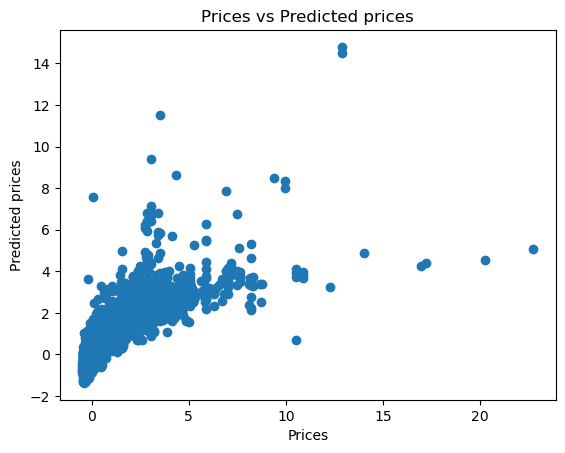

In [254]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

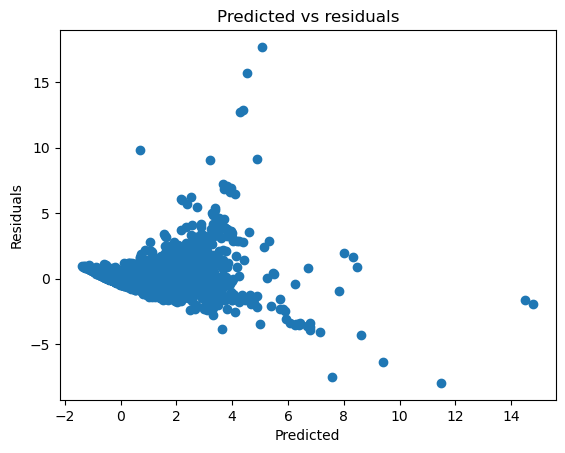

In [255]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

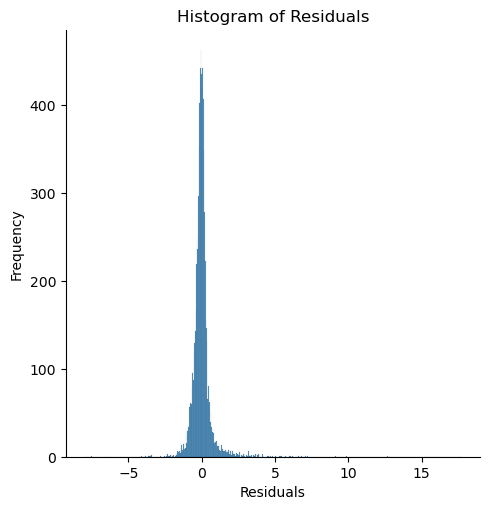

In [256]:
# Checking Normality of errors
sns.displot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### 3.3 Evaluación sobre test

In [257]:
# Predicting Test df with the model
y_test_pred = lm.predict(X_test)

In [258]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5802749501902611
MAE: 0.39399932361953416
MSE: 0.861555535111355
RMSE: 0.9282001589696884


# 3. REGRESION LINEAL POLINOMICA

In [259]:
from sklearn.preprocessing import PolynomialFeatures

In [295]:

# Create a Linear regressor
lmp= PolynomialFeatures(degree=3)

# Train the model using the training sets 
lmp.fit(X_train, y_train)

PolynomialFeatures(degree=3)

In [297]:
# Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns, lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,serv_barrio,0.025903
1,planta,0.019401
2,energia,0.014685
3,total_estaciones,-0.105674
4,total_transacciones,0.009319
5,hog_con_10,0.18284
6,tamano_medio_del_hogar,-0.051826
7,m2_constr,0.33952
8,m2_areasverdes,-0.009633
9,pm_tlogia_distrito,-0.004096


In [298]:
### 3.2 Evaluación sobre train
# Model prediction on train df
y_pred = lm.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))



R^2: 0.6701451345105851
MAE: 0.3809067831486955
MSE: 0.5951372243812403
RMSE: 0.7714513752539691


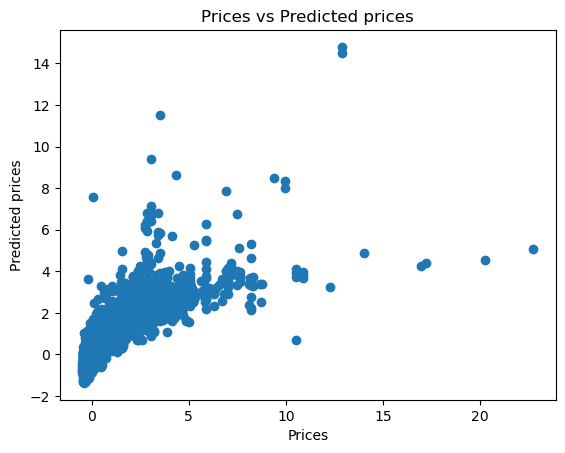

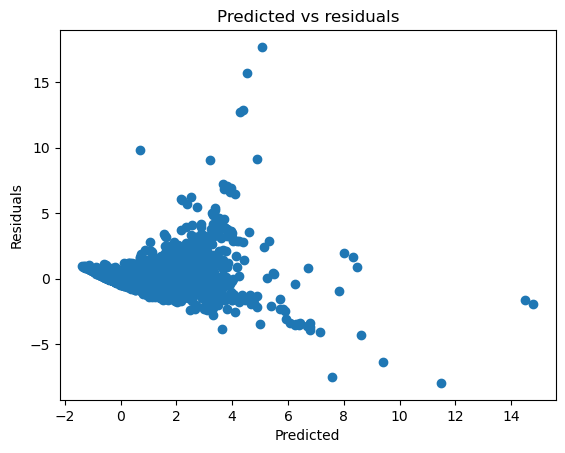

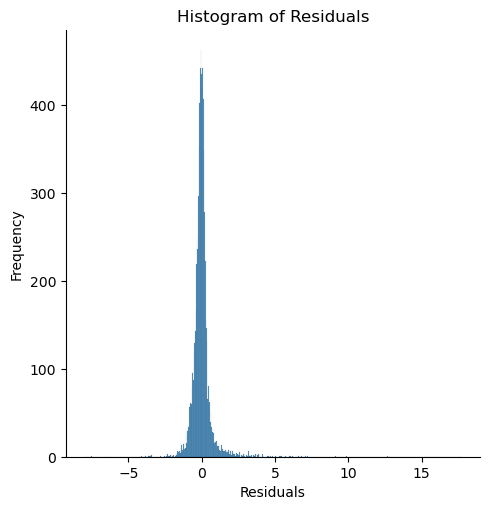

In [299]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()
# Checking Normality of errors
sns.displot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### 3.3 Evaluación sobre test

In [300]:

# Predicting Test df with the model
y_test_pred = lm.predict(X_test)
# Model Evaluation
acc_polreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_polreg)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5802749501902611
MAE: 0.39399932361953416
MSE: 0.861555535111355
RMSE: 0.9282001589696884


## 4. Random Forest Regressor 

### 4.1 Entrenamiento del modelo

In [265]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

### 4.2 Evaluación sobre train

In [266]:
# Model prediction on train df
y_pred = reg.predict(X_train)

In [267]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.970005618215581
MAE: 0.08681660577677247
MSE: 0.05411705264897237
RMSE: 0.23263072163618537


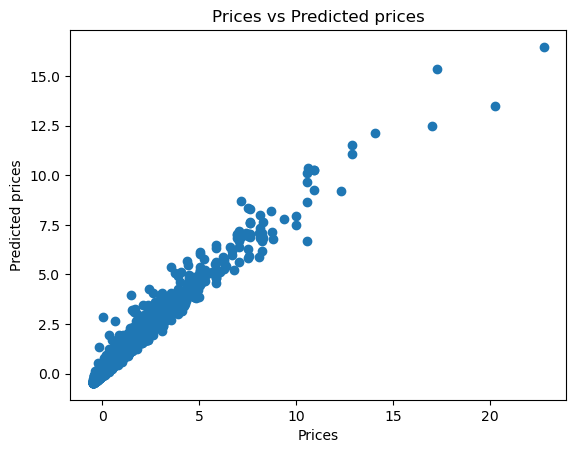

In [268]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

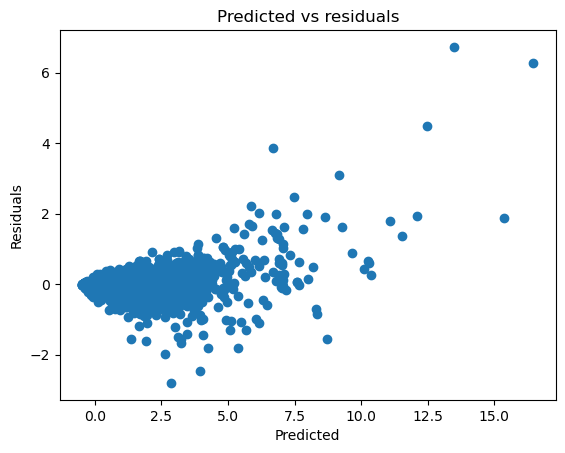

In [269]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

### 4.3 Evaluación sobre test

In [270]:
# Predicting Test df with the model
y_test_pred = reg.predict(X_test)

In [271]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7712172339035581
MAE: 0.2353419258318758
MSE: 0.4696147121974859
RMSE: 0.6852844024180661


## 5. XGBoost

### 5.1 Entrenamiento del modelo

In [272]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 5.2 Evaluación sobre train

In [273]:
# Model prediction on train df
y_pred = reg.predict(X_train)

In [274]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.984672456081768
MAE: 0.10197424190915497
MSE: 0.02765456234984914
RMSE: 0.16629660955608547


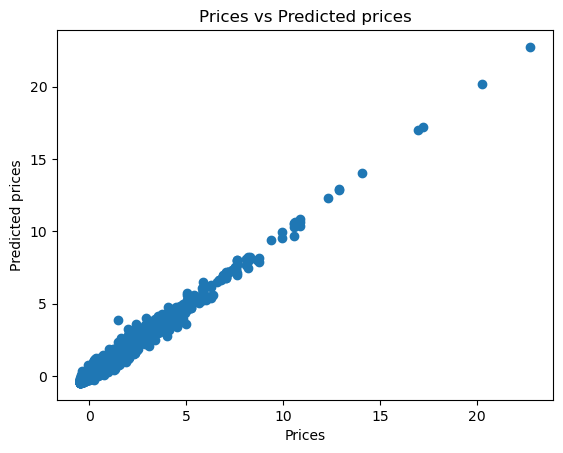

In [275]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

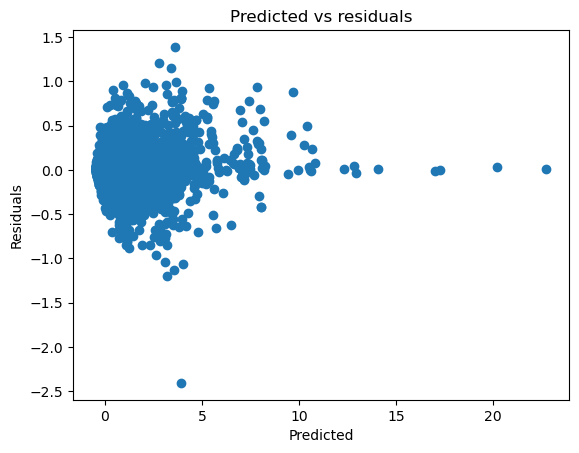

In [276]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### 5.3 Evaluación sobre test

In [277]:
# Predicting Test df with the model
y_test_pred = reg.predict(X_test)

In [278]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7411280059053555
MAE: 0.24194101164554604
MSE: 0.5313778615278156
RMSE: 0.7289566938630961


## 6. SVM Regressor

In [279]:
# # Creating scaled set to be used in model to improve our results
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler(transform_output="pandas")


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 6.1 Entrenamiento del modelo

In [280]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [281]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

### 6.2 Evaluación sobre train

In [282]:
# Model prediction on train df
y_pred = reg.predict(X_train)

In [283]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7690553146273749
MAE: 0.22758083214915192
MSE: 0.416679556429564
RMSE: 0.645507208658094


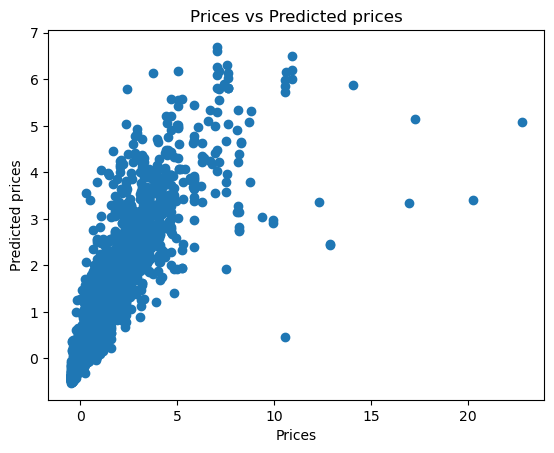

In [284]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

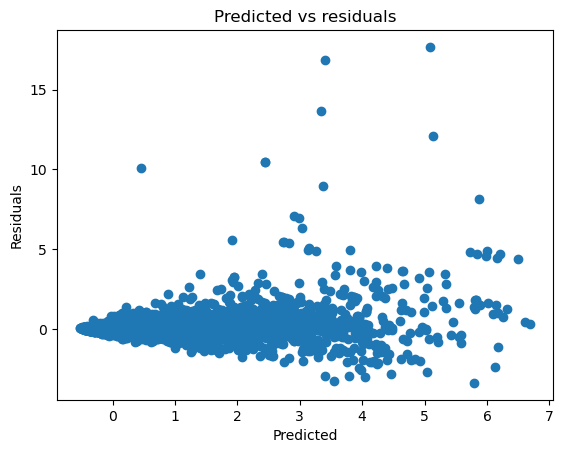

In [285]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

### 6.3 Evaluación sobre test

In [286]:
# Predicting Test df with the model
y_test_pred = reg.predict(X_test)

In [287]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7317789197625897
MAE: 0.26384955470725246
MSE: 0.5505684171503213
RMSE: 0.7420029765104189


# 7. Evaluación y comparación de modelos

In [294]:
df_performance = pd.DataFrame({
    'Model': ['Linear Regression','polinomical Rregression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_polreg *100,acc_rf*100, acc_xgb*100, acc_svm*100]})
df_performance.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,Random Forest,77.121723
3,XGBoost,74.112801
4,Support Vector Machines,73.177892
0,Linear Regression,58.027495
1,polinomical Rregression,58.027495
